In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [19]:
def plot_relationship(mean, std, num_of_samples, x_plot, color, label):
    upperbounds = mean + std/np.sqrt(num_of_samples) * 1.96
    lowerbounds = mean - std/np.sqrt(num_of_samples) * 1.96
    plt.fill_between(x_plot, upperbounds, lowerbounds, color=color, alpha=0.2)
    plt.plot(x_plot, mean, color=color, label=label, linewidth=1)

In [66]:
colors = ["#fb8072","#8dd3c7", "#bebada","#80b1d3"]

[10.20256607055664, 15.748644803365071, 20.802384732564292]


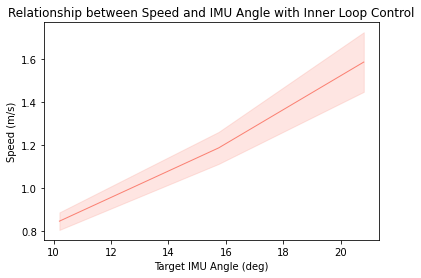

In [74]:
color = colors[0]
angles = [10, 15, 20]
speed_avgs = []
speed_stds = []
angle_avgs = []
for angle in angles:
    data = pd.read_csv("./data/1021_IL{}_1.csv".format(angle))
    wheel_speed = data.Wheel_speed[75:150]
    angle_avg = data.imu_angle[75:150]
    angle_avgs.append(np.mean(angle_avg))
    speed_avgs.append(np.mean(wheel_speed))
    speed_stds.append(np.std(wheel_speed))
print(angle_avgs)
plot_relationship(speed_avgs, speed_stds, 150-50, angle_avgs, color, "IL")
plt.xlabel("Target IMU Angle (deg)")
plt.ylabel("Speed (m/s)")
plt.title("Relationship between Speed and IMU Angle with Inner Loop Control")
plt.show()
    

(150, 2)


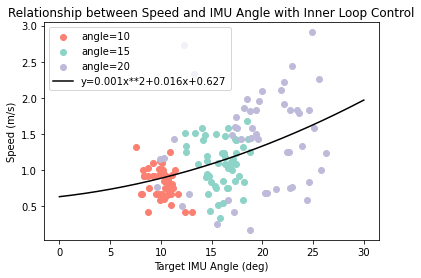

In [64]:
colors = ["#fb8072","#8dd3c7", "#bebada","#80b1d3"]
color = colors[0]
angles = [10, 15, 20]
wheel_speeds = np.array([])
imu_angles = np.array([])
for i in range(3):
    angle = angles[i]
    color = colors[i]
    data = pd.read_csv("./data/1021_IL{}_1.csv".format(angle))
    wheel_speed = data.Wheel_speed[75:125]
    if wheel_speeds.size == 0:
        wheel_speeds = np.array(wheel_speed)
    else:
        wheel_speeds = np.concatenate((wheel_speeds, np.array(wheel_speed)), axis=0)

    imu_angle = data.imu_angle[75:125]
    if imu_angles.size == 0:
        imu_angles = np.array(imu_angle)
    else:
        imu_angles = np.concatenate((imu_angles, np.array(imu_angle)), axis=0)
    plt.scatter(imu_angle, wheel_speed, color=color, label="angle={}".format(angle))
# plot_relationship(speed_avgs, speed_stds, 150-50, angles, color, "IL")
# print(imu_angles.shape)
# print(wheel_speeds.shape)
imu_angles = imu_angles.reshape(-1, 1)
imu_angles = np.concatenate((imu_angles, imu_angles**2), axis=1)
wheel_speeds = wheel_speeds.reshape(-1, 1)

reg = LinearRegression().fit(imu_angles, wheel_speeds)
b = reg.coef_[0][0]
a = reg.coef_[0][1]
c = reg.intercept_[0]

x_plot = np.linspace(0, 30, 1000)
y_plot = a * x_plot**2 + b*x_plot + c
plt.plot(x_plot, y_plot, color="black", label="y={:.3f}x**2+{:.3f}x+{:.3f}".format(a, b, c))

plt.xlabel("Target IMU Angle (deg)")
plt.ylabel("Speed (m/s)")
plt.title("Relationship between Speed and IMU Angle with Inner Loop Control")
plt.legend()
plt.show()
    

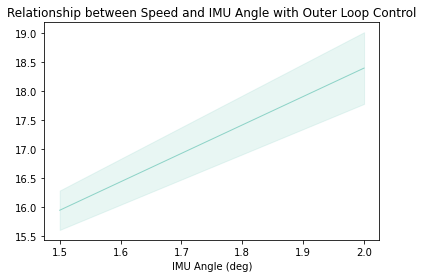

In [29]:
colors = ["#fb8072","#8dd3c7", "#bebada","#80b1d3"]
color = colors[1]
speeds = [1.5, 2.0]
angle_avgs = []
angle_stds = []
for speed in speeds:
    data = pd.read_csv("./data/0531_OL{}_1.csv".format(speed))
    wheel_angle = data.imu_angle[50:150]
    angle_avgs.append(np.mean(wheel_angle))
    angle_stds.append(np.std(wheel_angle))
plot_relationship(angle_avgs, angle_stds, 150-50, speeds, color, "OL")
plt.xlabel("Target Speed (m/s)")
plt.xlabel("IMU Angle (deg)")
plt.title("Relationship between Speed and IMU Angle with Outer Loop Control")
plt.show()
    

(200, 2)


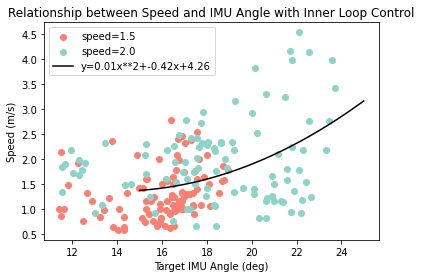

In [65]:
colors = ["#fb8072","#8dd3c7", "#bebada","#80b1d3"]
color = colors[0]
speeds = [1.5, 2.0]
wheel_speeds = np.array([])
imu_angles = np.array([])
for i in range(2):
    speed = speeds[i]
    color = colors[i]
    data = pd.read_csv("./data/0531_OL{}_1.csv".format(speed))
    wheel_speed = data.Wheel_speed[50:150]
    if wheel_speeds.size == 0:
        wheel_speeds = np.array(wheel_speed)
    else:
        wheel_speeds = np.concatenate((wheel_speeds, np.array(wheel_speed)), axis=0)

    imu_angle = data.imu_angle[50:150]
    if imu_angles.size == 0:
        imu_angles = np.array(imu_angle)
    else:
        imu_angles = np.concatenate((imu_angles, np.array(imu_angle)), axis=0)
    plt.scatter(imu_angle, wheel_speed, color=color, label="speed={}".format(speed))
imu_angles = imu_angles.reshape(-1, 1)
imu_angles = np.concatenate((imu_angles, imu_angles**2), axis=1)
wheel_speeds = wheel_speeds.reshape(-1, 1)

reg = LinearRegression().fit(imu_angles, wheel_speeds)
b = reg.coef_[0][0]
a = reg.coef_[0][1]
c = reg.intercept_[0]

x_plot = np.linspace(15, 25, 1000)
y_plot = a * x_plot**2 + b*x_plot + c
plt.plot(x_plot, y_plot, color="black", label="y={:.2f}x**2+{:.2f}x+{:.2f}".format(a, b, c))

plt.xlabel("Target IMU Angle (deg)")
plt.ylabel("Speed (m/s)")
plt.title("Relationship between Speed and IMU Angle with Inner Loop Control")
plt.legend()
plt.show()
    

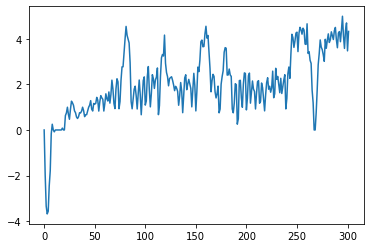

In [77]:
data = pd.read_csv("./data/0531_OL{}_1.csv".format(speed))
plt.plot(data.Wheel_speed, label="imu_angle")